## Matrix-Vector Multiplication

As a vector is simply a column of numbers, a matrix is simply a row of columns,
or a column of rows. This necessarily requires two numbers, the row and column
indices, to specify each matrix element. For example

\begin{equation}
  A = \begin{bmatrix} A[0,0] & A[0,1] \\
                      A[1,0] & A[1,1] \end{bmatrix}
    = \begin{bmatrix} 5 & 0 \\
                      2 & 3 \end{bmatrix}  
\end{equation}

is a 2-by-2 matrix. It takes two indices to address an element, and these are always ordered $[i,j]$ where $i$ denoted the **row** and $j$ denotes the **column**.

The addition of two matrices and the multiplication of
a matrix by a scalar proceed exactly as in the vector case. In particular,

\begin{equation*}
  (A+B)[i,j] = A[i,j]+B[i,j], \hskip 0.25in \hbox{e.g.,}
  \ \begin{bmatrix} 5 & 0\\ 2 & 3\end{bmatrix} +
   \begin{bmatrix} 2 & 4\\ 1 & -3 \end{bmatrix} =
   \begin{bmatrix} 7 & 4 \\ 3 & 0 \end{bmatrix}, 
\end{equation*}

and

\begin{equation*}
  (cA)[i,j] = cA[i,j], \hskip 0.25in \hbox{e.g.,}
  \hskip 0.25in  3\begin{bmatrix} 5 & 0 \\ 2 & 3 \end{bmatrix} 
   = \begin{bmatrix} 15 & 0 \\ 6 & 9 \end{bmatrix}. 
\end{equation*}

If $A$ is 2-by-2 and $x\in\maR^2$ we **define** $y=Ax$ to be the column of inner products of each row of $A$ with $x$. In particular, denoting the $i$th row of $A$ by $A[i,:]$ we find

\begin{equation} \label{eq:matvecmult}
  y[i] = A[i,:]x = A[i,0]x[0] + A[i,1]x[1]
\end{equation}

For example

\begin{equation} \label{eq:mymultex}
  \begin{bmatrix} 2 & 3 \\ 1 & 4 \end{bmatrix}
  \begin{bmatrix} 1 \\ -1 \end{bmatrix} = \begin{bmatrix} 2\cdot 1 + 3\cdot(-1) \\ 1\cdot 1 + 4\cdot(-1) \end{bmatrix}
  = \begin{bmatrix} -1 \\ -3 \end{bmatrix}. 
\end{equation}

We see that this $A$ takes planar vectors to planar vectors. The arithmetic is simple but static. We can use python to visualize any such planar transformation. In the widget below, please first enter a 2-by-2 matrix, $A$, and then move the slider to rotate $x$ round the unit circle and observe the associated movement of $Ax$.

I recommend that you experiment, in the widget below, with

\begin{equation} \label{eq:iwasawa}
  \mathbf{dilations}:\  A(\alpha) = \begin{bmatrix} \alpha & 0 \\ 0 & 1/\alpha \end{bmatrix} \hskip 0.25in
  \mathbf{shears}:\  N(\s) = \begin{bmatrix} 1 & \s \\ 0 & 1 \end{bmatrix} \and
  \mathbf{rotations}:\  K(\theta) = \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix}
\end{equation}

for several values of $\alpha$, $\s$, $\theta$.

In [1]:
# Matrix vector interaction - enter matrix elements - then click on slider to rotate unit vector x
%matplotlib widget     
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

plt.ioff()

print('Please enter the element (as a decimal number) of your matrix corresponding to the specified row and column')
A = [[float(input(str(y)+','+str(x)+' : ')) for x in range(2)] for y in range(2)]  # read the matrix elements
A = np.array(A)
Frob = np.sqrt(A[0,0]**2+A[0,1]**2+A[1,0]**2+A[1,1]**2)   # the Frobenius norm of A 
theta = 0
x = np.array([np.cos(theta), np.sin(theta)])  # the unit vector at angle theta
y = A@x
fig = plt.figure(num=' ') # num='Figure 3. Interactive Matrix-Vector Products')
s = 1.1   # scale factor for labels
xvec, = plt.plot([0,x[0]], [0,x[1]], linewidth=2) 
xlab = plt.text(s*x[0], s*x[1], 'x', fontsize=12)
yvec, = plt.plot([0,y[0]], [0,y[1]], 'r', linewidth=2)
ylab = plt.text(s*y[0], s*y[1], 'Ax', fontsize=12)

plt.axis([-Frob,Frob,-Frob,Frob])
plt.grid('on')
plt.title('A = [' + str(A[0,:]) + ',' + str(A[1,:]) + ']')

thetaS = widgets.FloatSlider(min=0, max=6.4, step=0.01, value=0, description='$\\theta$')

def update( theta = thetaS ):
    x = np.array([np.cos(theta), np.sin(theta)])
    y = A@x
    xvec.set_data([0,x[0]], [0,x[1]])
    xlab.set_position((s*x[0], s*x[1]))
    yvec.set_data([0,y[0]], [0,y[1]])
    ylab.set_position((s*y[0], s*y[1]))
    fig.canvas.draw_idle()

widgets.interactive(update)

layoutS = widgets.Layout(display='flex', flex_flow='column', justify_content='center')

controls = widgets.VBox([thetaS], layout = layoutS)

widgets.HBox([fig.canvas, controls])

Please enter the element (as a decimal number) of your matrix corresponding to the specified row and column
0,0 : 0
0,1 : -1
1,0 : -1
1,1 : 0


\begin{myfig}\label{fig:mf3} An interactive matrix-vector multiplier. After responding to the prompts for the four matrix elements, use the $\theta$ slider to move the blue $x$ vector along the unit circle. The widget plots, in red, the transformed vector $Ax$.\end{myfig}

This widget hopefully justifies our uses of the words dilation, shear, and rotation. With these words in mind the construction of the associated matrices in (\ref{eq:iwasawa}) comport with their action. In particular, with $\alpha>1$,
the matrix $A(\alpha)$ stretches in the horizontal direction and compresses in the vertical direction. Similarly, with $\s>0$, the matrix $N(\s)$ stretches in the horizontal direction while leaving the vertical direction unchanged. Regarding the putative rotation matrix, $K(\theta)$, although $\cos(\theta)$ and $\sin(\theta)$ are indeed suggestive, their particular layout is not exactly obvious.


\begin{exercise}\label{ex:KFP}
Given a vector $x$ and angle $\theta$ we build a matrix $R$ that rotates $x$ counter-clockwise by $\theta$ to the vector $y$. Write

\begin{equation}\label{eq:xpyp}
x = \begin{bmatrix} r\cos(\phi) \\ r\sin(\phi) \end{bmatrix} \and
y = \begin{bmatrix} r\cos(\theta+\phi) \\ r\sin(\theta+\phi) \end{bmatrix}
\end{equation}

and then note $y=Rx$ is two equations for the four elements of $R$. As these equations are to hold for each $\phi$. Show that the two easy choices, $\phi=0$ and $\phi=\pi/2$, lead to $R=K(\theta)$.
\end{exercise}


The very responsiveness of our widget may actually defeat your ability to see what type of curve is traced by $Ax$ as $x$ traverses the unit circle. We therefore offer a static version below of the transformation of points on the unit disk by representative dilations, shears, and rotations.

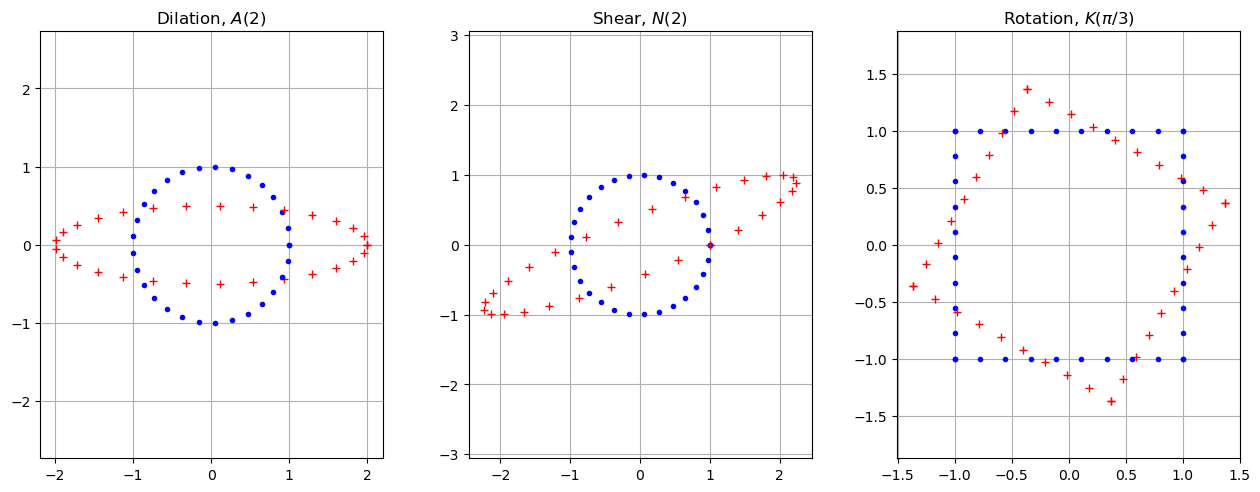

In [21]:
# Matrix Vector Multiplication
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

T = np.linspace(0,2*np.pi,30)

A = np.array([[2, 0],[0, 0.5]])
for t in T:
    x = np.array([np.cos(t), np.sin(t)])
    y = A@x
    ax1.plot(x[0],x[1],'b.')
    ax1.plot(y[0],y[1],'r+')
    
ax1.axis('equal')
ax1.grid('on')
ax1.set_title('Dilation, $A(2)$', fontsize=12)

A = np.array([[1, 2],[0, 1]])
for t in T:
    x = np.array([np.cos(t), np.sin(t)])
    y = A@x
    ax2.plot(x[0],x[1],'b.')
    ax2.plot(y[0],y[1],'r+')

ax2.axis('equal')
ax2.grid('on')
ax2.set_title('Shear, $N(2)$', fontsize=12)

T = np.linspace(-1,1,10)
theta = np.pi/3
c = np.cos(theta)
s = np.sin(theta)
A = np.array([[c,-s],[s,c]])
for t in T:
    x = np.array([1, t])
    y = A@x
    ax3.plot(x[0],x[1],'b.')
    ax3.plot(y[0],y[1],'r+')
    x = np.array([t, 1])
    y = A@x
    ax3.plot(x[0],x[1],'b.')
    ax3.plot(y[0],y[1],'r+')
    x = np.array([-1,t])
    y = A@x
    ax3.plot(x[0],x[1],'b.')
    ax3.plot(y[0],y[1],'r+')
    x = np.array([t, -1])
    y = A@x
    ax3.plot(x[0],x[1],'b.')
    ax3.plot(y[0],y[1],'r+')

ax3.axis('equal')
ax3.grid('on')
ax3.set_title('Rotation, $K(\\pi/3)$', fontsize=12);

\begin{myfig}\label{fig:mf4}  An illustration of the matrix vector multiplication
conducted in (\ref{eq:iwasawa}). The first two panels show the transformation of the unit circle by a dilation of 2 and shear of 2. As the rotation of a circle is hard to see we instead, in the third panel, rotate a square by $\pi/3$.
\end{myfig}

These before and after figures give the gist of the transformation but fail to track individual points. We fix that below.

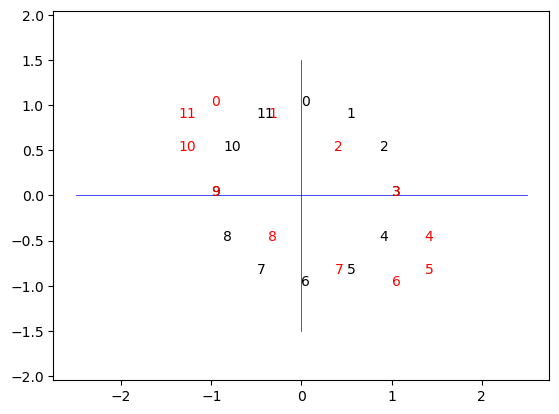

In [1]:
# Track the shear of the unit circle
import numpy as np                 # import math functions
import matplotlib.pyplot as plt    # import plot functions
%matplotlib inline                 

plt.plot([-2.5,2.5],[0,0],'b',linewidth=0.5)         # draw a blue horizontal line
plt.plot([0,0],[-1.5,1.5],'b',linewidth=0.5)         # draw a blue vertical line

N = np.array([[1, -1],              # build a shear matrix with shear value 2
              [0, 1]])

for hour in range(12):                # make hour count from 0 to 11
    ang = np.pi/2 - hour*2*np.pi/12   # make a multiple of 2*pi/12, but start at pi/2 and go clockwise
    x = np.array([[np.cos(ang)],   # make a unit column vector at that angle
                  [np.sin(ang)]])
    y = N@x                        # multiply x by N
    plt.text(x[0], x[1], hour)        # mark x with a black hour, 
    plt.text(y[0], y[1], hour, color='r')  # mark y with a red hour

plt.axis('equal');                  # fix the aspect ratio

\begin{myfig}\label{fig:mf5} Illustration of the action **shear by 2**, i.e., $N(2)x$, in red, 
for the twelve $x$ vectors, in black.
Do you see that $N(2)$ takes the black 0 to the red 0, the black 1 to the red
1 and so on? Yes, both the black 3 and black 9 remain unmoved by $N(2)$. Why?\end{myfig}

Let us take look at this code. If your code does not come with line numbers please select "View" at the top of this page and "Toggle Line Numbers."

 - Python is a small language with a large set of expansion modules. Regarding lines 2 and 3 we import two modules, **numpy** for numerical work, and **matplotlib.pyplot** for graphics, using the two standard abbreviations.
 
 - Graphical output can be directed to several possible places via the **%matplotlib** command. We have directed output to occur **inline,** that is within the notebook itself, via line 4.
 
 - On lines 5 and 6 we plot two lines to serve as our horizontal and vertical axes.
 
 - On lines 9 and 10 we build our shear matrix, N.
 
 - On lines 12 through 18 we step through the hours of the clock, via a **for** loop, that
 
     - constructs an angle based on the value of hour, line 13
 
     - constructs a unit vector, x, with this angle, lines 14 and 15
 
     - shears this unit vector to y=Nx, line 16 (matrix-vector multiplication via @)
 
     - plots the hour at x and the sheared hour at y, lines 17 and 18
     
 - finally we set the aspect ratio and title the graph, lines 20 and 21.

\begin{exercise}\label{ex:code1}
Copy our clock code to the cell below and edit it to track minutes rather than hours by replacing each 12 with 60. Note that the default fontsize used in lines 17 and 18 is too large. Add a final argument to each plt.text call to set the fontsize to a readable value. Explore shear values from -2.5 up to 2.5.
\end{exercise}

In [4]:
# Your code here

We have so far considered the transformation of single points and simple shapes. In our next example we transform each point in a gray-scale image. Such an image has gray-scale value between 0 (black) and 255 (white) at each pixel. In general the image, img, has $m$ rows and $n$ columns with the $(0,0)$ pixel at top left. We shift the origin to the center of the image and so transform pixel coordinates $[i,j]$ to spatial coordinates via

\begin{equation}\label{eq:ijxy}
     x = [j-int(n/2), int(m/2)-i]
\end{equation}

we then transform this point with our matrix $A$ via $y=Ax$ and then transform these spatial coordinates into pixel coordinates in our final image, img2, of size $M\times N$, via

\begin{equation}\label{eq:ijxy2}
  \eqalign{
     [I,J]  &= [int(M/2) - int(y[1]), int(y[0]) + int(N/2)] \cr
     img2[I,J] &= img[i,j] \cr}
\end{equation}

We implement these steps in the code cell below, with a bit of preliminary work to first find the dimensions of the transformed image (by transforming the edges of the original) and a bit of clean-up work to paint "missing" pixels in the transformed image.

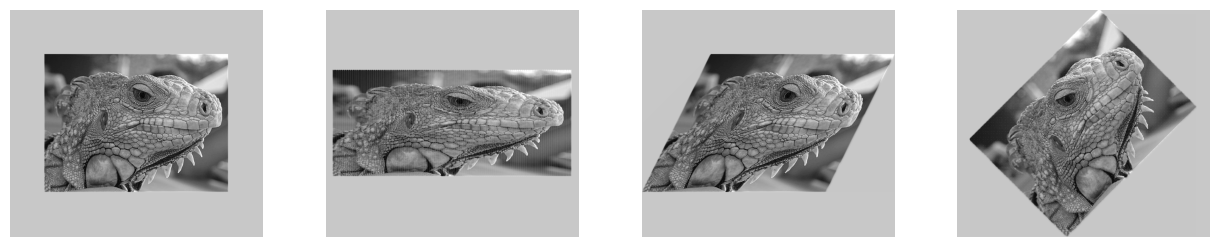

In [25]:
# Transform an image
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

def imtrans(img, A):   # transform img with A, with origin placed at center of image

    (m,n) = img.shape                  # img has m rows and n columns
    miny0, maxy0, miny1, maxy1 = 0, 0, 0, 0    # these will hold shape of the new image

    for i in [0, m-1]:   # scan top and bottom
        x = np.array([0, int(m/2)-i])
        for j in range(n):
            x[0] = j-int(n/2)
            y = A@x
            miny0, maxy0, miny1, maxy1 = min(y[0], miny0), max(y[0], maxy0), min(y[1], miny1), max(y[1], maxy1)
 
    for j in [0, n-1]:   # scan left and right
        x = np.array([j-int(n/2), 0])
        for i in range(m):
            x[1] = int(m/2)-i
            y = A@x
            miny0, maxy0, miny1, maxy1 = min(y[0], miny0), max(y[0], maxy0), min(y[1], miny1), max(y[1], maxy1)

    N = int(np.ceil(maxy0 - miny0)) + 2  # adding 2 to "compensate" for int induced "errors"
    M = int(np.ceil(maxy1 - miny1)) + 2

    img2 = 200*np.ones((M,N))     # create a gray canvas of sufficient size

    for i in range(m):                         # step through the rows                       
        for j in range(n):                     # step through the columns 
            x = np.array([j-int(n/2), int(m/2)-i])
            y = A@x
            J = int(y[0] + int(N/2))
            I = int(int(M/2) - y[1])
            img2[I, J] = img[i, j] 

    for i in range(1,M-1):    # paint empty (200) pixels with local average, avoiding edges
        for j in range(1,N-1):
            if (img2[i,j] == 200) :
                s = img2[i-1,j-1]+img2[i-1,j]+img2[i-1,j+1]+img2[i,j-1]+img2[i,j+1]+img2[i+1,j-1]+img2[i+1,j]+img2[i+1,j+1]
                img2[i,j] = int(s/8)
                
    return img2

img = plt.imread('../Images/lizard.jpg')
(m,n) = img.shape 

a = 1.3
A = np.array([[a,0],[0,1/a]])  # dilation
imgA = imtrans(img, A)
(mA,nA) = imgA.shape 

a = 0.5
N = np.array([[1,a],[0,1]])    # shear
imgN = imtrans(img, N)
(mN,nN) = imgN.shape

a = np.pi/4
K = np.array([[np.cos(a), -np.sin(a)],[np.sin(a), np.cos(a)]])   # rotation
imgK = imtrans(img, K)
(mK,nK) = imgK.shape

Bm = max(m, mA, mN, mK)   # parameters to place on a common matte
Bn = max(n, nA, nN, nK)
mmid = int(Bm/2)
nmid = int(Bn/2)

imatte = 200*np.ones((Bm,Bn))     # create a gray canvas of sufficient size to correct for image scaling
msh = mmid-int(m/2)
nsh = nmid-int(n/2)
imatte[msh:m+msh,nsh:n+nsh] = img
ax1.imshow(imatte, cmap='gray', vmin=0, vmax=255)
ax1.axis('off')

Amatte = 200*np.ones((Bm,Bn)) # matte
msh = mmid-int(mA/2)
nsh = nmid-int(nA/2)
Amatte[msh:mA+msh,nsh:nA+nsh] = imgA
ax2.imshow(Amatte, cmap='gray', vmin=0, vmax=255)
ax2.axis('off')

Nmatte = 200*np.ones((Bm,Bn)) # matte
msh = mmid-int(mN/2)
nsh = nmid-int(nN/2)
Nmatte[msh:mN+msh,nsh:nN+nsh] = imgN
ax3.imshow(Nmatte, cmap='gray', vmin=0, vmax=255)
ax3.axis('off')

Kmatte = 200*np.ones((Bm,Bn)) # matte
msh = mmid-int(mK/2)
nsh = nmid-int(nK/2)
Kmatte[msh:mK+msh,nsh:nK+nsh] = imgK
ax4.imshow(Kmatte, cmap='gray', vmin=0, vmax=255)
ax4.axis('off');

\begin{myfig}\label{fig:lizard} An image of a lizard, normal at left and then dilated, sheared and rotated as we move left to right. \end{myfig}

\begin{exercise}\label{ex:liz3}
Please adapt the code cell above to transform color images by transforming each of its three color planes.
\end{exercise}

We surmise, on studying Figures \ref{fig:lizard} and \ref{fig:mf4}, that dilations, shears, and rotations preserve area. That is, when transforming shapes with one of these matrices, the new shape has the same area as the original. In order to make this precise, we return to this [Figure](1.1.VectorOrientation.ipynb/#mf2) from our previous notebook  and stack its two columns into the matrix

\begin{equation}\label{eq:Mgen}
  M = \begin{bmatrix} a & b \\ c & d \end{bmatrix} 
\end{equation}

This matrix transforms the square $\{0\le x\le 1,\,0\le y\le 1\}$ to the parallelogram of the aforementioned Figure. That is, $M$ transforms a shape with area 1 to a shape with area $ad-bc$. As such, we name this combination of elements the **determinant** of $M$ and abbreviate it by 

\begin{equation}\label{eq:detbox}
  \boxed{\det(M) \equiv ad - bc }
\end{equation}

and note that $\det(M)$ encodes the area multiplier. We offer a concrete example of this in Figure \ref{fig:cswap}.

\begin{exercise} \label{ex:Mob0} Please confirm that $\det(A(\alpha))=\det(N(\s))=\det(K(\theta))=1$.
\end{exercise}

Your solution here.

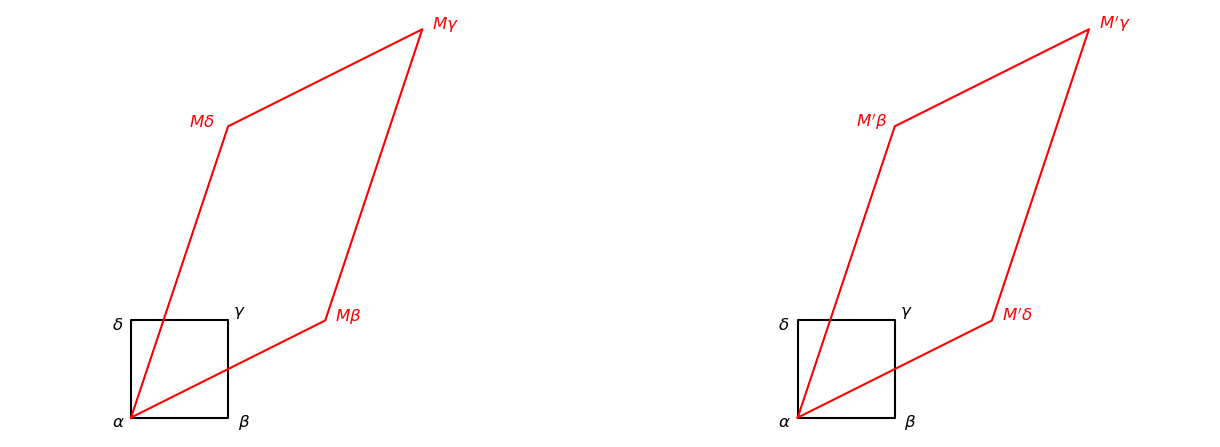

In [7]:
# impact of column swapping on orientation and area
%matplotlib inline
import numpy as np    
import matplotlib.pyplot as plt 

fig, (ax1, ax2) = plt.subplots(1, 2)    # create a figure with 2 axes (plot windows)
plt.subplots_adjust(right=2, top=1, wspace=0.25)  # adjust them for the right look

M =  np.array([[2,1],[1,3]])
Mp = np.array([[1,2],[3,1]])

ax1.plot([0,1,1,0,0],[0,0,1,1,0],'k')
ax1.text(-.2, -.1, '$\\alpha$', fontsize = 12)
ax1.text(1.1, -.1, '$\\beta$', fontsize = 12)
ax1.text(1.05, 1.05, '$\\gamma$', fontsize = 12)
ax1.text(-.2, 0.9, '$\\delta$', fontsize = 12)
beta = np.array([1,0]) #np.array([[1],[0]])
Mbeta = M@beta
ax1.text(Mbeta[0]+.1, Mbeta[1], '$M\\beta$', color = 'r', fontsize = 12)
gamma = np.array([1,1]) # np.array([[1],[1]])
Mgamma = M@gamma
ax1.text(Mgamma[0]+.1, Mgamma[1], '$M\\gamma$', color = 'r', fontsize = 12)
delta = np.array([0,1]) # np.array([[0],[1]])
Mdelta = M@delta
ax1.text(Mdelta[0]-0.4, Mdelta[1], '$M\\delta$', color = 'r', fontsize = 12)
ax1.plot([0, Mbeta[0], Mgamma[0], Mdelta[0], 0], [0, Mbeta[1], Mgamma[1], Mdelta[1], 0],'r')
ax1.axis('equal')
ax1.axis('off')

ax2.plot([0,1,1,0,0],[0,0,1,1,0],'k')
ax2.text(-.2, -.1, '$\\alpha$', fontsize = 12)
ax2.text(1.1, -.1, '$\\beta$', fontsize = 12)
ax2.text(1.05, 1.05, '$\\gamma$', fontsize = 12)
ax2.text(-.2, 0.9, '$\\delta$', fontsize = 12)
Mpbeta = Mp@beta
ax2.text(Mpbeta[0]-.4, Mpbeta[1], "$M'\\beta$", color = 'r', fontsize = 12)
Mpgamma = Mp@gamma
ax2.text(Mpgamma[0]+.1, Mpgamma[1], "$M'\\gamma$", color = 'r', fontsize = 12)
Mpdelta = Mp@delta
ax2.text(Mpdelta[0]+0.1, Mpdelta[1], "$M'\\delta$", color = 'r', fontsize = 12)
ax2.plot([0, Mpbeta[0], Mpgamma[0], Mpdelta[0], 0], [0, Mpbeta[1], Mpgamma[1], Mpdelta[1], 0],'r')
ax2.axis('equal')
ax2.axis('off');

\begin{myfig}\label{fig:cswap} The deformation of the black square, $\\{(x,y):0\le x\le 1,\ 0\le y\le 1\\}$, with boundary orientation $\\{\alpha,\beta,\gamma,\delta\\}$, by 

\begin{equation*}
 M = \begin{pmatrix} 2 & 1 \\ 1 & 3 \end{pmatrix} \hskip 0.3in \hbox{at left, and} \hskip 0.3in 
 M' = \begin{pmatrix} 1 & 2 \\ 3 & 1 \end{pmatrix} \hskip 0.3in \hbox{at right}
\end{equation*}

We observe that they each transform the square to the parallelogram of area $2\cdot 3 - 1\cdot 1 = 5$, but that $M$ retains the original orientation while $M'$ reverses it.\end{myfig}

Figure \ref{fig:cswap}, by contrasting the action of $M$ and $M'$, the matrix obtained by swapping the columns of $M$,
reveals that although they each map the unit square to the same parallelogram, that $\det(M')=-\det(M)$. As such, the true
area multiplier is $|\det(M)|$.

Figure \ref{fig:cswap} also provides a means for seeing when a determinant is, positive, negative, or zero. 
In particular, again with regard to Figure \ref{fig:cswap} we note that the second column of $M$ is counterclockwise from the first column - in agreement with the convention for orientation laid down in [our previous notebook](1.1.VectorOrientation.ipynb), while this is reversed when we swap the order of the two columns. As a result; $\det(M)>0$ when its 2nd column is *counterclockwise* from the first, $\det(M)<0$ when its 2nd column is *clockwise* from the first. Finally, so long as its two columns are not colinear the parallelogram in Figure \ref{fig:cswap} will have a nonzero area. Let us see that this is the only way to achieve zero area or, equivalently, a zero determinant. That is, let us show that if $\det(M)=0$ then its second column is a multiple of its first.

If $\det(M)=0$ then $ad=bc$ and we recognize a two cases.

(i) $ad\ne 0$ then either is $bc$ and so we may divide $ad=bc$ by $bd$ and achieve

\begin{equation}\label{eq:det0i}
  \frac{a}{b} = \frac{c}{d}
\end{equation}

and call this common value $t$. From (\ref{eq:det0i}) we learn that $b=ta$ and $c = td$ and that when stacked this reads

\begin{equation}\label{eq:det0i2}
  \begin{bmatrix} b \\ d \end{bmatrix} = t\begin{bmatrix} a \\ c \end{bmatrix}
\end{equation}

i.e., the second column of $M$ is a multiple of its first.

\begin{exercise}\label{ex:detz}
Consider the second case. That is, show that when $ad=bc=0$ the second column of $M$ remains a multiple of its first.
\end{exercise}

Your solution here.

In addition to mapping regions, Figure \ref{fig:cswap} also shows us how the boundary of the region gets mapped. The convention for boundary orientation is that the region stays on our left as we traverse the boundary counterclockwise.
Do you see that our choice $\{\alpha,\beta,\gamma,\delta\}$ in Figure \ref{fig:cswap} for the unit square follows this convention?

In general, if $R$ is a planar region bounded by an oriented curve then $M$ transforms $R$ to a region with area $|\det(M)|{\rm area(R)}$ and that the new region retains the orientation of $R$ when $\det(M)>0$ and reverses the orientation of $R$ when $\det(M)<0$. As such, **when $\det(M)=1$ we note that $M$ preserves both area and orientation.**

Next Section: [1.4 Matrix Matrix Multiplication](1.4.MatrixMatrixMultiplication.ipynb)